<a id='home'></a>
### purpose

visualize results across offset methods

In [1]:
from pythonimports import *
from myfigs import save_pdf, draw_xy

import MVP_summary_functions as mvp

import itertools as it
import seaborn as sns
plt.rcParams.update({'font.family' : 'serif'})

outerdir = '/home/b.lind/offsets/run_20220919_tutorial'

t0 = dt.now()  # notebook timer

fig_dir = makedir(f'{outerdir}/figs')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	October 02, 2023 - 14:43:11 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit 4df974c6efa2868236cc272fcc84eb1059ca8aef  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Sep 26 09:31:50 2023 -0400
#########################################################



### update metadata to handle 6-trait data

In [2]:
mvp.markers['RONA'] = 'v'

mvp.boxplot_kwargs['palette'].update(
    {
        'rda_outliers' : 'white',
        'RONA' : 'darkgray'
    }
)

mvp.factor_names.update(
    {
        'RONA' : 'RONA (6Xtraits)',
        'rda_outliers' : 'RDA outliers'
    }
)

### get validation scores

In [3]:
validations = []
for method in ['gradient_forests', 'lfmm2', 'rda', 'RONA']:
    validation_file = f'{outerdir}/{method}/validation/tutorial_validation_scores.txt'
    
    df = pd.read_table(validation_file)
    
    print(method)
    display(df)
    
    validations.append(df)

gradient_forests


,seed,ind_or_pooled,marker_set,garden,score,program
0,tutorial,pooled,adaptive,1,-0.865575,GF
1,tutorial,pooled,adaptive,2,-0.857720,GF
2,tutorial,pooled,adaptive,3,-0.816133,GF
3,tutorial,pooled,adaptive,4,-0.824409,GF
4,tutorial,pooled,adaptive,5,-0.781449,GF
...,...,...,...,...,...,...
295,tutorial,pooled,neutral,96,-0.763916,GF
296,tutorial,pooled,neutral,97,-0.755834,GF
297,tutorial,pooled,neutral,98,-0.846403,GF
298,tutorial,pooled,neutral,99,-0.856854,GF


lfmm2


,seed,ind_or_pooled,marker_set,garden,score,program
0,tutorial,pooled,adaptive,1,-0.225591,lfmm2
1,tutorial,pooled,adaptive,2,-0.253032,lfmm2
2,tutorial,pooled,adaptive,3,-0.433640,lfmm2
3,tutorial,pooled,adaptive,4,-0.388361,lfmm2
4,tutorial,pooled,adaptive,5,-0.408002,lfmm2
...,...,...,...,...,...,...
295,tutorial,pooled,neutral,96,-0.238206,lfmm2
296,tutorial,pooled,neutral,97,-0.239014,lfmm2
297,tutorial,pooled,neutral,98,-0.128537,lfmm2
298,tutorial,pooled,neutral,99,-0.212345,lfmm2


rda


,seed,ind_or_pooled,ntraits,structcorr,garden,score,marker_set,program
0,tutorial,pooled,ntraits-6,nocorr,1,-0.702244,adaptive,rda-nocorr
1,tutorial,pooled,ntraits-6,nocorr,2,-0.757074,adaptive,rda-nocorr
2,tutorial,pooled,ntraits-6,nocorr,3,-0.770040,adaptive,rda-nocorr
3,tutorial,pooled,ntraits-6,nocorr,4,-0.670438,adaptive,rda-nocorr
4,tutorial,pooled,ntraits-6,nocorr,5,-0.672325,adaptive,rda-nocorr
...,...,...,...,...,...,...,...,...
795,tutorial,pooled,ntraits-6,structcorr,96,-0.615214,rda_outliers,rda-structcorr
796,tutorial,pooled,ntraits-6,structcorr,97,-0.573997,rda_outliers,rda-structcorr
797,tutorial,pooled,ntraits-6,structcorr,98,-0.567906,rda_outliers,rda-structcorr
798,tutorial,pooled,ntraits-6,structcorr,99,-0.622891,rda_outliers,rda-structcorr


RONA


,seed,marker_set,program,garden,score,env
0,tutorial,all,RONA,1,-0.566404,env1_mat
1,tutorial,all,RONA,2,-0.524656,env1_mat
2,tutorial,all,RONA,3,-0.192662,env1_mat
3,tutorial,all,RONA,4,0.035159,env1_mat
4,tutorial,all,RONA,5,0.113368,env1_mat
...,...,...,...,...,...,...
1795,tutorial,neutral,RONA,96,-0.336398,env6_PWM
1796,tutorial,neutral,RONA,97,-0.245075,env6_PWM
1797,tutorial,neutral,RONA,98,-0.274050,env6_PWM
1798,tutorial,neutral,RONA,99,-0.311749,env6_PWM


In [4]:
validation = pd.concat(validations).reset_index(drop=True)

validation

,seed,ind_or_pooled,marker_set,garden,score,program,ntraits,structcorr,env
0,tutorial,pooled,adaptive,1,-0.865575,GF,NaN,NaN,NaN
1,tutorial,pooled,adaptive,2,-0.857720,GF,NaN,NaN,NaN
2,tutorial,pooled,adaptive,3,-0.816133,GF,NaN,NaN,NaN
3,tutorial,pooled,adaptive,4,-0.824409,GF,NaN,NaN,NaN
4,tutorial,pooled,adaptive,5,-0.781449,GF,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3195,tutorial,NaN,neutral,96,-0.336398,RONA,NaN,NaN,env6_PWM
3196,tutorial,NaN,neutral,97,-0.245075,RONA,NaN,NaN,env6_PWM
3197,tutorial,NaN,neutral,98,-0.274050,RONA,NaN,NaN,env6_PWM
3198,tutorial,NaN,neutral,99,-0.311749,RONA,NaN,NaN,env6_PWM


In [5]:
validation.marker_set.value_counts()

adaptive        1000
all             1000
neutral         1000
rda_outliers     200
Name: marker_set, dtype: int64

In [6]:
validation.program.value_counts()

RONA              1800
rda-nocorr         400
rda-structcorr     400
GF                 300
lfmm2              300
Name: program, dtype: int64

### figures INCLUDING RONA

In [7]:
from myfigs import adjust_box_widths

In [8]:
def handle_kwargs(include_RONA=None, include_rda_outliers=None):
    validation_data = validation.copy()
    
    if include_RONA is False:
        validation_data = validation_data[~validation_data.program.str.contains('RONA')]
        mvp.hue_order['program'] = ['lfmm2', 'rda-nocorr', 'rda-structcorr', 'GF']
    else:
        mvp.hue_order['program'] = ['RONA', 'lfmm2', 'rda-nocorr', 'rda-structcorr', 'GF']
        
    if include_rda_outliers is False:
        validation_data = validation_data[validation_data.marker_set != 'rda_outliers']
        mvp.hue_order['marker_set'] = ['adaptive', 'all', 'neutral']
    else:
        mvp.hue_order['marker_set'] = ['adaptive', 'all', 'neutral', 'rda_outliers']
    
    return validation_data, mvp.hue_order['program'], mvp.hue_order['marker_set']


def plot_performance(include_RONA=True, include_rda_outliers=True, save=True):
   
    validation_data, program_order, marker_order = handle_kwargs(include_RONA=include_RONA,
                                                                 include_rda_outliers=include_rda_outliers)
    
    for hue in ['program', 'marker_set']:
        if hue == 'program':
            order = program_order
        else:
            order = marker_order

        g = sns.catplot(data=validation_data,
                        x=hue,
                        y='score',
                        order=order,
                        **mvp.boxplot_kwargs,
                        kind='box')

        g.ax.invert_yaxis()
        g.axes[0][0].axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
        mvp.jitter_fliers(g)
        mvp.update_ticklabels(g.ax, replace=[('-', '\n'), (' ', '\n'), ('6X', '6-')])
        g.ax.set_ylim(g.ax.get_ylim()[0], -1)
        g.set(title='6-trait')
#         g.set_axis_labels(None, "Performance (Kendall's $\\tau$)", fontsize=12)
        g.ax.set_xlabel(None, fontsize=12)
        g.ax.set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)

        if save is True:
            save_pdf(f'{fig_dir}/all_programs_{hue}_includeRONA-{include_RONA}_includeRDAoutliers-{include_rda_outliers}.pdf')

        plt.show()
    
    pass

        
def plot_marker_set(include_RONA=True, include_rda_outliers=True, save=True):
    
    validation_data, program_order, marker_order = handle_kwargs(include_RONA=include_RONA,
                                                                 include_rda_outliers=include_rda_outliers)
    
    print(f'{program_order = }')
    
    g = sns.catplot(data=validation_data,
                    x='program',
                    y='score',
                    order=program_order,
                    hue='marker_set',
                    hue_order=marker_order,
                    **mvp.boxplot_kwargs,
                    legend=False,
                    kind='box')

    g.ax.invert_yaxis()
    g.axes[0][0].axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
    mvp.jitter_fliers(g)
    mvp.update_ticklabels(g.ax, replace=[('-', '\n'), (' ', '\n'), ('6X', '6-')])
    g.ax.set_ylim(0.65, -1)
    g.set_axis_labels(None, "Performance (Kendall's $\\tau$)", fontsize=12)
#     g.ax.set_ylabel("Performance (Kendall's $\\tau$)")
    g.ax.set_xlabel('')
    
    g.set(title='6-trait')
    adjust_box_widths(list(g.axes[0]), 0.85)

    g.figure.set_size_inches((8, 5))

    # g._legend.remove()

    # mvp.add_legend(g.figure, color_by='marker_set', loc='upper center', bbox_to_anchor=(0.48, 1.1), ncol='auto')
    mvp.add_legend(g.figure, color_by='marker_set', loc='center left', bbox_to_anchor=(1, 0.55))

    if save is True:
        save_pdf(f'{fig_dir}/program_by_markerset_includeRONA-{include_RONA}_includeRDAoutliers-{include_rda_outliers}.pdf')

    plt.show()
    
    pass

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/all_programs_program_includeRONA-True_includeRDAoutliers-True.pdf


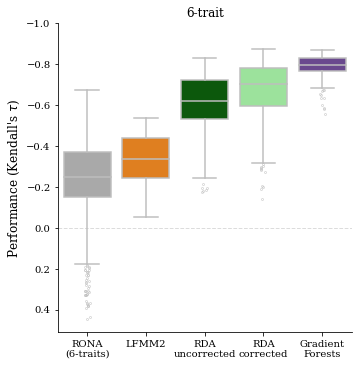

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/all_programs_marker_set_includeRONA-True_includeRDAoutliers-True.pdf


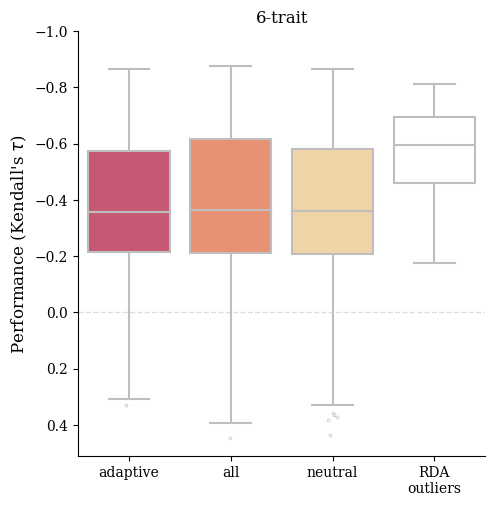

In [9]:
plot_performance()

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/all_programs_program_includeRONA-True_includeRDAoutliers-False.pdf


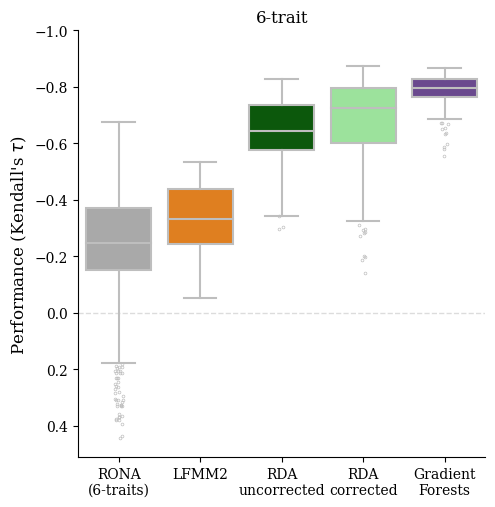

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/all_programs_marker_set_includeRONA-True_includeRDAoutliers-False.pdf


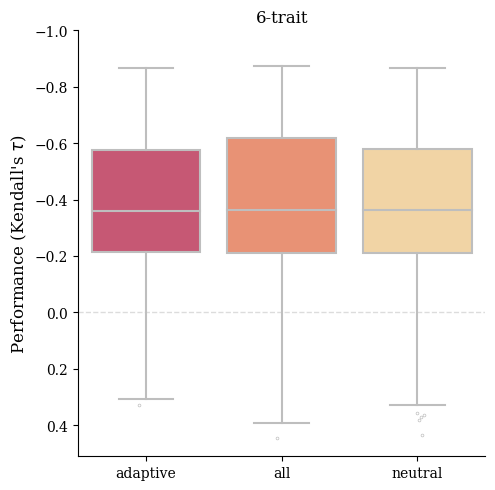

In [10]:
plot_performance(include_rda_outliers=False)

program_order = ['RONA', 'lfmm2', 'rda-nocorr', 'rda-structcorr', 'GF']
Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/program_by_markerset_includeRONA-True_includeRDAoutliers-True.pdf


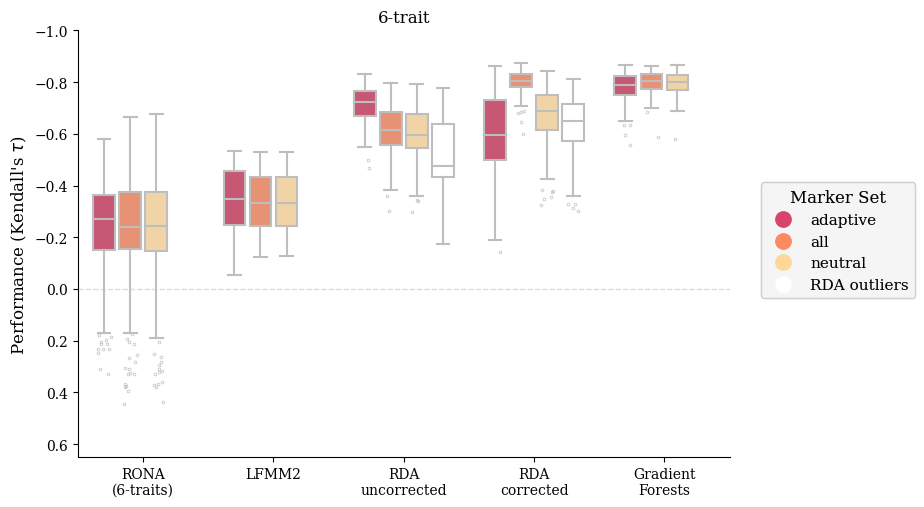

In [11]:
plot_marker_set()

program_order = ['RONA', 'lfmm2', 'rda-nocorr', 'rda-structcorr', 'GF']
Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/program_by_markerset_includeRONA-True_includeRDAoutliers-False.pdf


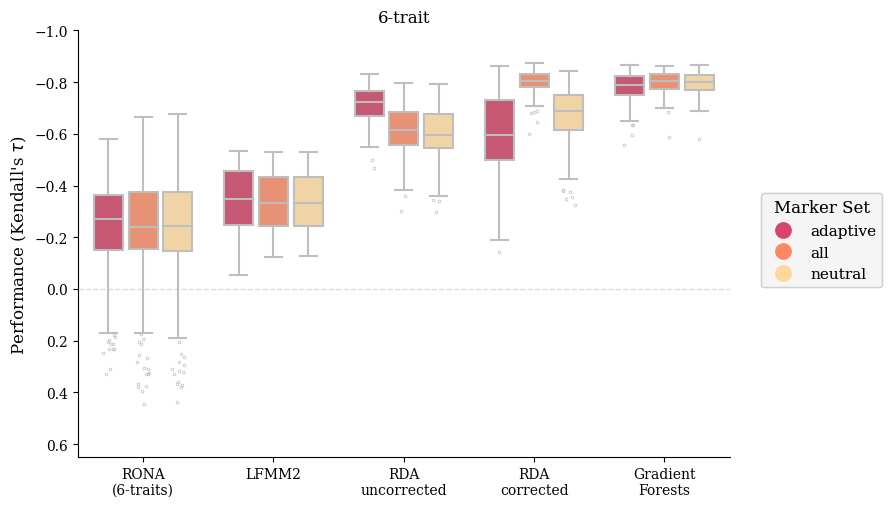

In [12]:
plot_marker_set(include_rda_outliers=False)

In [13]:
def plot_scatter(include_RONA=True, include_rda_outliers=False, save=True):
    
    validation_data, program_order, marker_order = handle_kwargs(include_RONA=include_RONA,
                                                                 include_rda_outliers=include_rda_outliers)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(marker_order), sharey=True, figsize=(8, 5))
    
    for i, (marker_set_i, marker_set_j) in enumerate(it.combinations(marker_order, 2)):
        ax = axes[i]
        
        seti = validation_data[validation_data.marker_set == marker_set_i].copy().reset_index(drop=True)
        setj = validation_data[validation_data.marker_set == marker_set_j].copy().reset_index(drop=True)

#         fig, ax = plt.subplots()

        # scatter each program so I can customize marker set
        for program in setj.program.unique():
            xi = seti[seti.program == program]
            yj = setj[setj.program == program]
            ax.scatter(xi.score,
                       yj.score,
                       c=yj.program.map(mvp.boxplot_kwargs['palette']),
                       alpha=0.5,
                       marker=mvp.markers[program]
                      )

        draw_xy(ax, equal_aspect=True, lims=[-1, 0] if include_RONA is False else None)  # set x=y line

        # what perc of scores better than the other?
        perc = perc = '{:.2f}'.format(
            ((seti.score <= setj.score).sum() / nrow(seti)) * 100
        )
        print(f'{perc}% of {marker_set_i} <= {marker_set_j}')
        
        if i == 1:
            ax.set_title('6-trait')

        ax.set_xlabel(f"$\it{marker_set_i}$ performance\n(Kendall's $\\tau$)")
        ax.set_ylabel(f"$\it{marker_set_j}$ performance\n(Kendall's $\\tau$)")

        ax.invert_xaxis()
        ax.invert_yaxis()
        
        ax.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
        ax.axvline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)

    mvp.add_legend(fig, color_by='program', loc='center left', bbox_to_anchor=(1, 0.5), use_markers=True)
    plt.tight_layout()
    
    if save is True:
        save_pdf(f'{fig_dir}/marker_set_comparison_includeRONA-{include_RONA}_includeRDAoutliers-{include_rda_outliers}.pdf')

    plt.show()
    
    pass

48.50% of adaptive <= all
49.40% of adaptive <= neutral
61.40% of all <= neutral
Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/marker_set_comparison_includeRONA-True_includeRDAoutliers-False.pdf


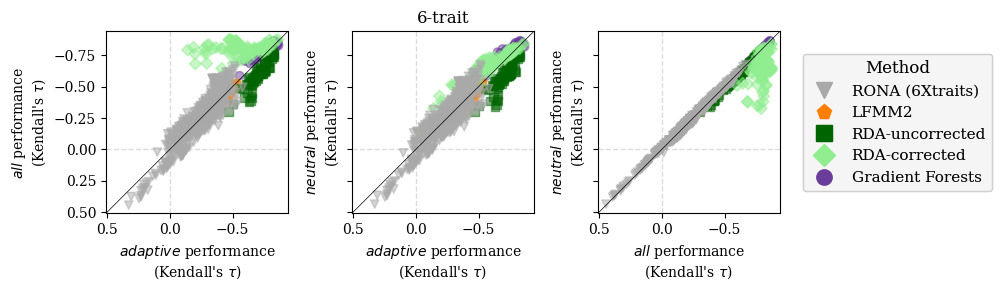

In [14]:
plot_scatter()

44.25% of adaptive <= all
46.75% of adaptive <= neutral
78.75% of all <= neutral
Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/marker_set_comparison_includeRONA-False_includeRDAoutliers-False.pdf


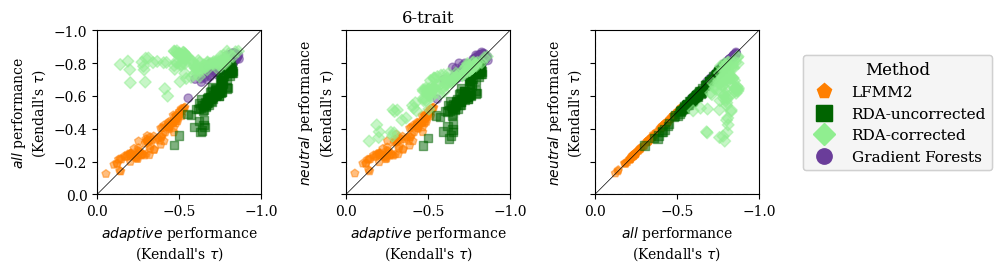

In [15]:
plot_scatter(include_RONA=False)

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/method_marker_scatter_GF.pdf


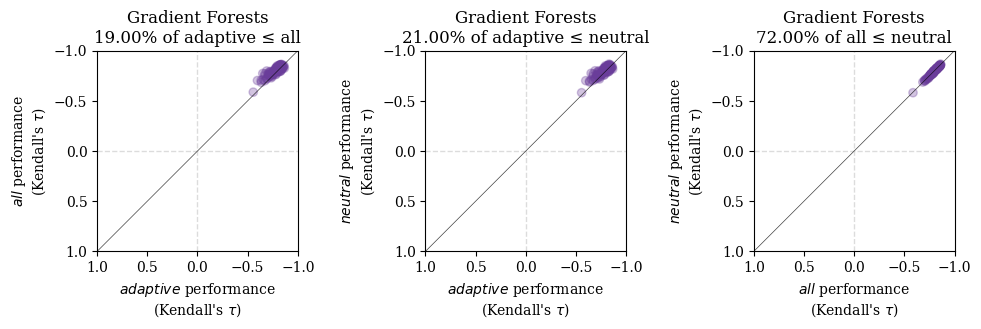

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/method_marker_scatter_lfmm2.pdf


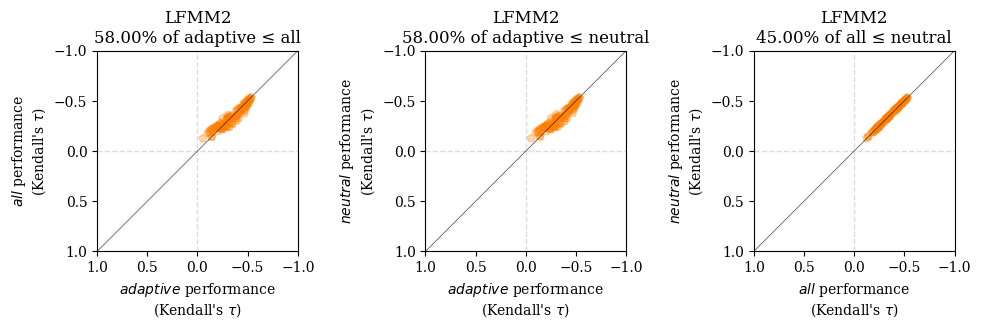

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/method_marker_scatter_rda-nocorr.pdf


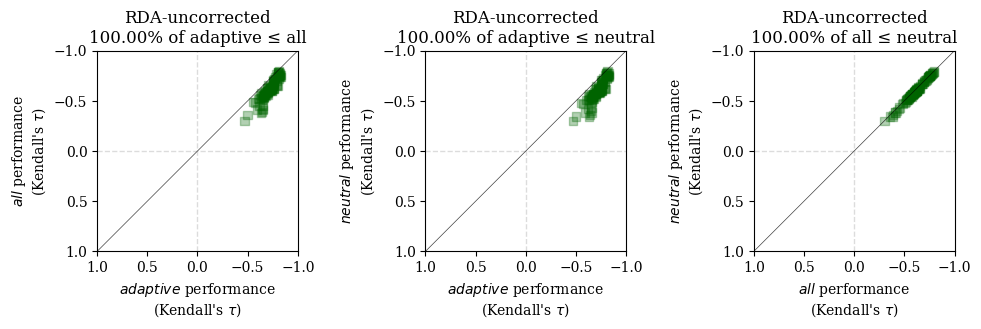

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/method_marker_scatter_rda-structcorr.pdf


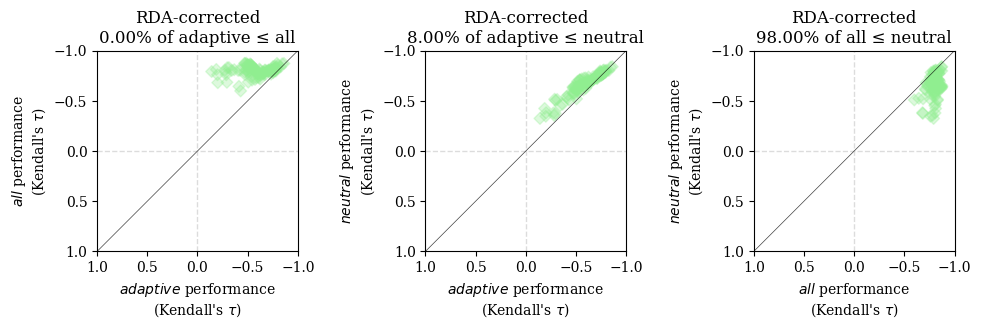

Saved to:  /home/b.lind/offsets/run_20220919_tutorial/figs/method_marker_scatter_RONA.pdf


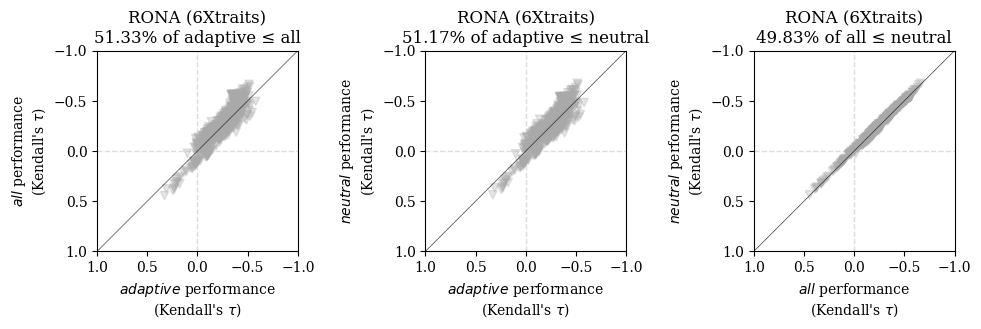

In [16]:
for program in validation.program.unique():
    df = validation[validation.program==program].copy()
    
    fig, axes = plt.subplots(ncols=3, figsize=(10, 10))
    
    for i, (marker_set_i, marker_set_j) in enumerate(it.combinations(mvp.hue_order['marker_set'], 2)):
        seti = df[df.marker_set == marker_set_i].copy().reset_index(drop=True)
        setj = df[df.marker_set == marker_set_j].copy().reset_index(drop=True)
        
        ax = axes[i]

        ax.scatter(seti.score, setj.score,
                   c=setj.program.map(mvp.boxplot_kwargs['palette']),
                   marker=mvp.markers[program],
                   alpha=0.3)

        # set x=y line
        draw_xy(ax, lims=[-1, 1], alpha=0.75, equal_aspect=True)

        perc = perc = '{:.2f}'.format(
            ((seti.score <= setj.score).sum() / nrow(seti)) * 100
        )
        ax.set_title(f'{mvp.factor_names[program]}\n{perc}% of {marker_set_i} ≤ {marker_set_j}')

        ax.set_xlabel(f"$\it{marker_set_i}$ performance\n(Kendall's $\\tau$)")
        ax.set_ylabel(f"$\it{marker_set_j}$ performance\n(Kendall's $\\tau$)")
        
        ax.invert_yaxis()
        ax.invert_xaxis()
        
        ax.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
        ax.axvline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
    
    plt.tight_layout()
    
    save_pdf(f'{fig_dir}/method_marker_scatter_{program}.pdf')
    
    plt.show()

In [17]:
formatclock(dt.now() - t0)

'0-00:00:07'